## DWI REDHA MUHADDATS-09011181823005
Prediksi Jumlah Pembelian Mobil menggunakan artificial neuron network

# ARTIFICIAL NEURON NETWORK

Secara sederhana, artificial neuron network adalah sebuah alat pemodelan data statistik non-linier. Artificial neuron network dapat digunakan untuk memodelkan hubungan yang kompleks antara input dan output untuk menemukan pola-pola pada data

### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ***Pandas (Python for Data Analysis)*** adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data
* ***NumPy (Numerical Python)*** adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python
* ***Matplotlib*** adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik
* ***Seaborn*** adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik dan memiliki beberapa kelebihan dibandingkan dengan Matplotlib yaitu, hasil visualisasi Seaborn diklaim lebih bagus dan indah juga menggunakan serangkaian kode yang lebih mudah


### LOAD DATASET

In [ ]:
data = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### VISUALISASI DATASET

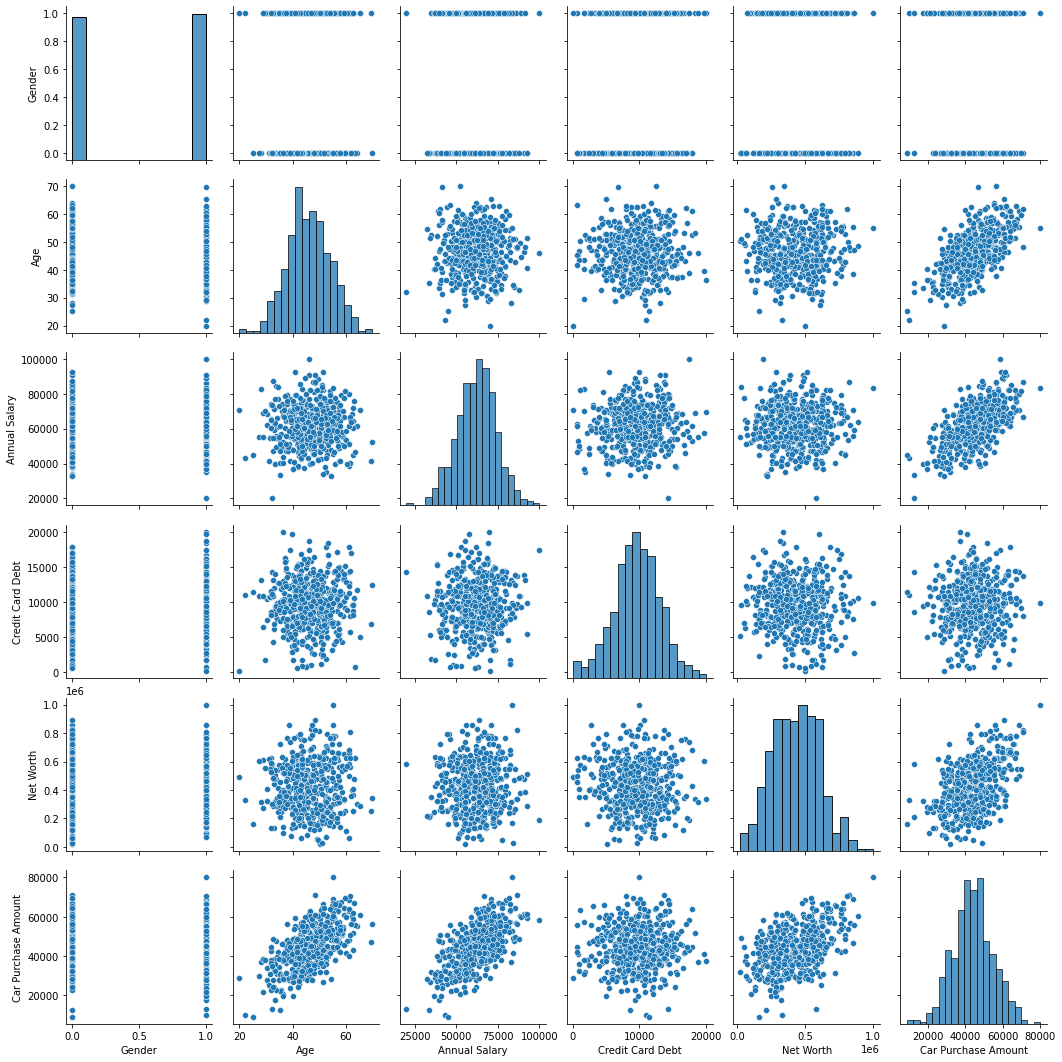

In [ ]:
sns.pairplot(data)

### TRAINING & CLEANING DATASET

Pada bagian ini kita melakukan scaling dan membersihkan data dari informasi yang tidak kita perlukan seperti data non-numerical


***Feature Scaling*** adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya

rumus yang digunakan untuk proses Feature Scaling ini adalah Standarisation dan Normalisation:
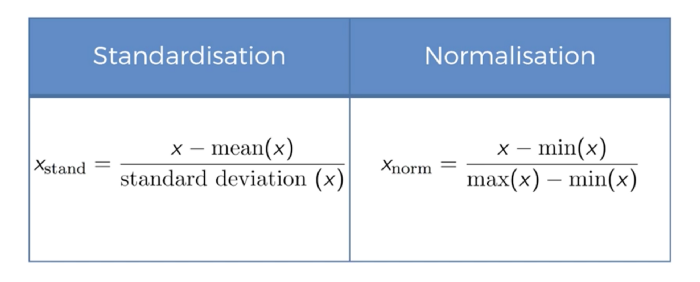

In [ ]:
X = data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [ ]:
y = data['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [ ]:
X.shape

(500, 5)

In [ ]:
y.shape

(500,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [ ]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [ ]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [ ]:
y= y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### TRAINING MODEL

1.split berfungsi untuk membagi data X dan data y untuk ditraining dan ditesting

* ***Training set*** adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.
* ***Test set*** adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

2.Tensorflow sebenarnya adalah tools untuk melakukan komputasi numerik (lebih luas daripada hanya sekedar untuk deep learning). Contoh-contoh task terkait komputasi numerik adalah seperti mengerjakan operasi matriks, melakukan (convex) function optimization, menghitung gradient atau hessian (turuan kedua) dari sebuah fungsi



In [ ]:
X_scaled.shape

(500, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.25)
X_train.shape

(375, 5)

In [ ]:
y_test.shape

(125, 1)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 0s 8ms/step - loss: 0.0972 - val_loss: 0.0462
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0250
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0169
Epoch 4/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 8/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 9/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 10/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 11/20
12/12 [

### EVALUASI MODEL

* validation loss > training loss adalah overfitting
* validation loss  < training loss adalah underfitting
* validation loss = training loss adalah Perfect fitting

Tujuannya adalah membuat validation loss serendah mungkin. Beberapa overfitting tidak masalah. Yang terpenting pada akhirnya adalah validation loss serendah mungkin.
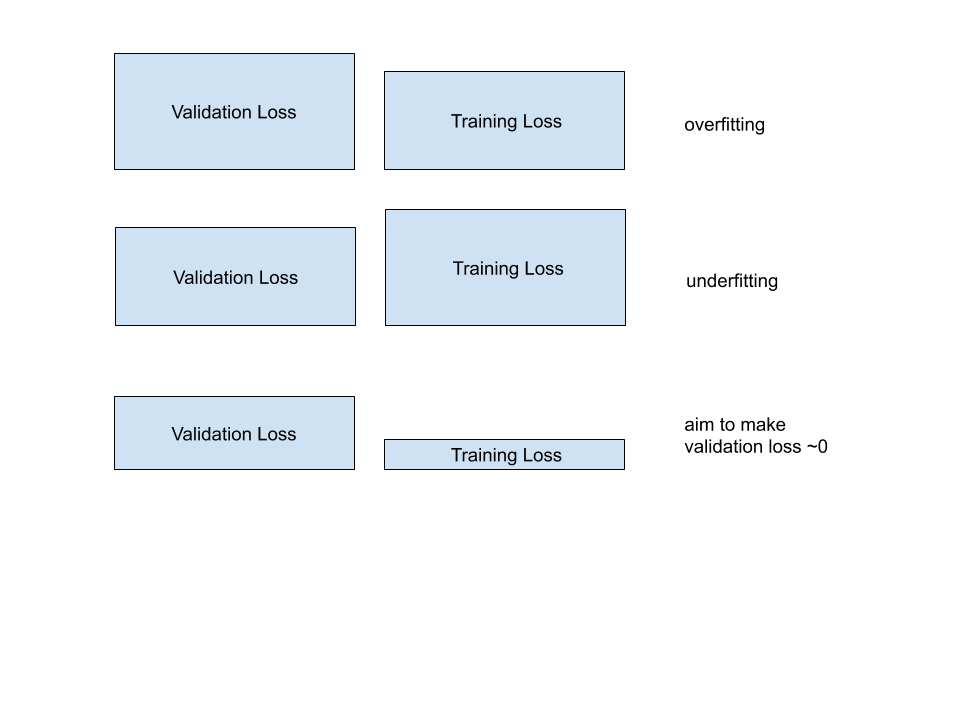



In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


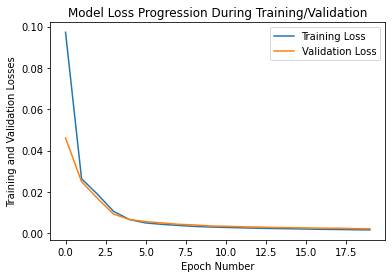

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

Dari grafik yang ditunjukan,nilai validation loss terus menurun seiring bertambahnya nilai epoch yang berarti menunjukan program berjalan dengan baik

In [ ]:
X_Testing = np.array([[1, 50, 50000, 10985, 629312]])
y_predict = model.predict(X_Testing)
y_predict.shape

(1, 1)

In [ ]:
print('Jumlah pembelian mobil yang diharapkan=', y_predict[:,0])

Jumlah pembelian mobil yang diharapkan= [294481.62]
